In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/davide.lobba/.conda/envs/dask_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


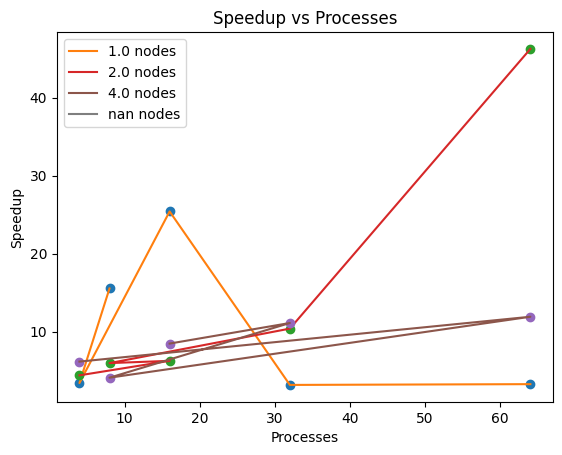

In [5]:
csv_serial = pd.read_csv("/home/davide.lobba/HPC_Project/serial/output/performance_benchmarks.csv", header=0)
serial_time = min(csv_serial["time"])

df = pd.read_csv("/home/davide.lobba/HPC_Project/parallel/MPI/output/performance_benchmarks.csv", header=0)

nodes = df['nodes'].unique()

for node in nodes:
    data = df[df['nodes'] == node]
    data['speedup'] = serial_time / data.groupby('processes')['time'].transform('min')
    plt.plot(data['processes'].unique(), data['speedup'].unique(), 'o')
    plt.plot(data['processes'].unique(), data['speedup'].unique(), label=f'{node} nodes')

plt.xlabel('Processes')
plt.ylabel('Speedup')
plt.title('Speedup vs Processes')
plt.legend()
plt.show()